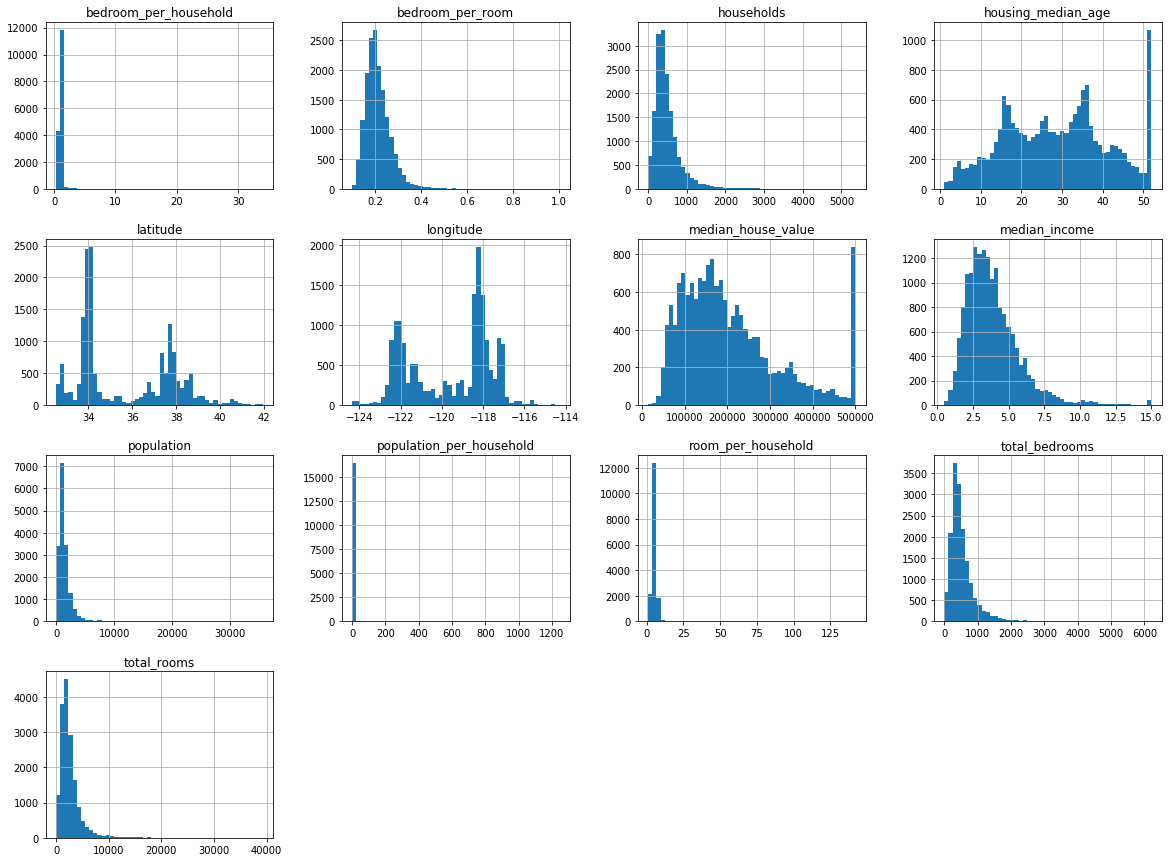

In [ ]:
%matplotlib inline

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix

#Load Housing Data 
def load_housing_data(housing_path="/Users/christophe/Dev/ML/handson-ml/datasets/housing"):
    csv_path = os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)


#housing.hist(bins=50,figsize=(20,15))

#Create the Tets set
def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]


#Expand Dataset
def expand_dataset(housing_dataset):
    dataset = housing_dataset.copy()
    dataset["room_per_household"] = dataset["total_rooms"] / dataset["households"]
    dataset["bedroom_per_household"] = dataset["total_bedrooms"] / dataset["households"]
    dataset["bedroom_per_room"] = dataset["total_bedrooms"] / dataset["total_rooms"]
    dataset["population_per_household"] = dataset["population"] / dataset["households"]
    return dataset

housing = load_housing_data()
#housing.head()

#housing.info()

housing["ocean_proximity"].value_counts()

housing.describe()

#Stratified the train and test set to make sure you have similar distribution 
#of features among training and testing sets

#Create a new feature, named income category
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"]  < 5 ,5.0, inplace=True)


split = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

#housing.hist(bins=50,figsize=(20,15))


for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)
   
housing = strat_train_set.copy()


housing = expand_dataset(housing)
corr_matrix = housing.corr()

corr_matrix["median_house_value"].sort_values(ascending=False)

#plt.matshow(corr_matrix, cmap=plt.cm.gist_heat)

housing.hist(bins=50,figsize=(20,15))
attributes = ["median_house_value","median_income","bedroom_per_room","room_per_household","latitude"]
scatter_matrix(housing[attributes], figsize=(12,8))
housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1)